# Clasificador Naive Bayes con iris plant

### 1. Cargar base de datos iris plant

In [1]:
import pandas as pd

In [56]:
ds = pd.read_csv("../datasets/iris_plant/PCA_iris_plant.csv")

In [71]:
#ds bi-clase
# 0 = setosa , 1 = versicolor , 2 = virginica
ds_b = pd.read_csv("../datasets/iris_plant/PCA_iris_plant.csv")
ds_b["variety"] = ds_b["variety"].replace([2],0)
#ds_b["variety"] = ds_b["variety"].replace([2],1)

### 2. Separar la base de datos

In [72]:
x = ds[["x1","x2"]]
y = ds[["variety"]]
#----------------------------
xb = ds_b[["x1","x2"]]
yb = ds_b[["variety"]]

### 3. Validación cruzada (datos de entrenamiento y prueba)

In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)
#------------------------------------------------------------------
xb_train,xb_test,yb_train,yb_test = train_test_split(xb,yb,test_size=0.35)

### 4. Clasificador Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sbs
import matplotlib.pyplot as plt

#### Función para entrenar el modelo y mostrar matriz de confusión

In [45]:
def train_clf(model,X_train,X_test,y_train,y_test,labels):
    model.fit(X_train,y_train.values.ravel())
    model_predicted = model.predict(X_test)
    confusion_ma = confusion_matrix(y_test,model_predicted)
    accuracy = model.score(X_test,y_test.values.ravel())
    print("Predicción del modelo:")
    print(model_predicted)
    print("Valores reales:")
    print(y_test.values.ravel())    
    print('Precisión del modelo:',accuracy*100,'%')
    print('-----------\n')
    print("Matriz de confusión")
    sbs.heatmap(data=confusion_ma,cmap="Pastel1",annot=True,xticklabels=labels,yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("predicción")
    return confusion_ma    

#### función para mostrar la curva ROC del modelo

In [52]:
def plot_roc_curve(model,X_test,y_test):
    #El modelo debe estar ajustado previamente
    #model.fit(X_test,y_test.values.ravel())
    y_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    roc_auc = auc(fpr,tpr)
    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Verdadero Positivo')
    plt.xlabel('Falso Positivo')
    plt.show()

### 4.1 Modelo 1

Predicción del modelo:
[1 2 0 2 2 0 2 0 1 2 0 0 0 1 1 2 0 0 2 0 1 1 0 1 1 1 1 0 0 2 1 0 2 1 1 0 0
 0 2 1 2 1 2 1 0 2 1 0 0 1 1 1 2]
Valores reales:
[1 2 0 2 2 0 2 0 1 2 0 0 0 2 2 2 0 0 2 0 1 1 0 1 1 1 1 0 0 2 1 0 2 1 1 0 0
 0 2 1 2 1 2 1 0 1 1 0 0 1 1 1 2]
Precisión del modelo: 94.33962264150944 %
-----------

Matriz de confusión


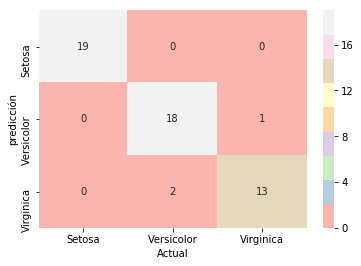

In [87]:
clf_NB = GaussianNB(priors=[1/3,1/3,1/3])
labels = ["Setosa","Versicolor",'Virginica']
conf_ma = train_clf(model=clf_NB,X_train=x_train  ,X_test=x_test  ,y_train=y_train,y_test=y_test,labels=labels)

Predicción del modelo:
[0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0]
Valores reales:
[0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
Precisión del modelo: 81.13207547169812 %
-----------

Matriz de confusión


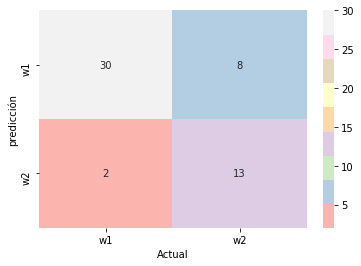

In [85]:
#clasificador bi-clase 
clf_NB_b = GaussianNB(priors=[1/3,2/3])
labels = ["w1","w2"]
conf_ma = train_clf(model=clf_NB_b,X_train=xb_train,X_test=xb_test,y_train=yb_train,y_test=yb_test,labels=labels)

### 4.1.1 Curva ROC

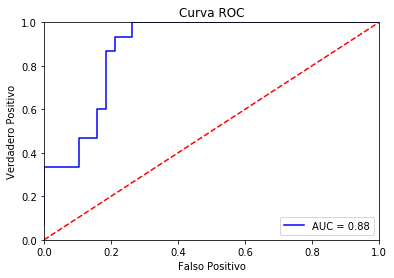

In [86]:
plot_roc_curve(model=clf_NB_b,X_test=xb_test,y_test=yb_test)

### 4.2. Modelo 2

Predicción del modelo:
[0 1 1 2 1 2 2 1 1 1 0 1 1 2 0 1 1 1 2 0 2 1 0 1 0 0 0 0 1 1 0 1 2 0 0 1 1
 1 0 0 1 1 0 0 1 0 1 1 0 2 2 2 1]
Valores reales:
[0 2 1 2 1 2 2 1 2 1 0 2 1 1 0 1 1 1 1 0 2 1 0 1 0 0 0 0 1 1 0 1 2 0 0 2 1
 2 0 0 1 1 0 0 1 0 2 1 0 2 2 2 2]
Precisión del modelo: 83.01886792452831 %
-----------

Matriz de confusión


Text(0.5,1,'Matriz de confusión NB')

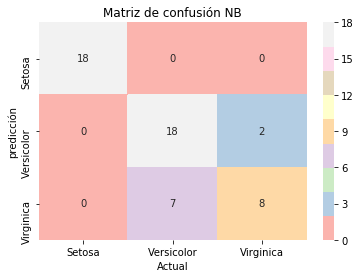

In [49]:
probs = [1/3,1/3,1/3]
clf_NB = GaussianNB(priors=probs)
labels = ["Setosa","Versicolor",'Virginica']
train_clf(model=clf_NB,X_train=x_train  ,X_test=x_test  ,y_train=y_train,y_test=y_test,labels=labels)
plt.title("Matriz de confusión NB")

### 4.2.1 Curva ROC